In [27]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature



datadir = "../data/"
figdir = "../figures/"

g = 9.81
omega = 7.29e-5

In [28]:
mdt = "cnes"
ds_mdt = xr.open_dataset(datadir + f"mean_dynamic_topography_{mdt}_ease.nc")
ds_mdt

<xarray.Dataset> Size: 4MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB ...
    lon      (y, x) float32 279kB ...
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    mdt      (y, x) float64 558kB ...
    u        (y, x) float64 558kB ...
    v        (y, x) float64 558kB ...
    err_mdt  (y, x) float64 558kB ...
    err_u    (y, x) float64 558kB ...
    err_v    (y, x) float64 558kB ...
Attributes: (12/32)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    cdm_data_type:              Grid
    history:                    2023-02-27T08:55:06Z : Creation
    contact:                    aviso@altimetry.fr, sjousset@groupcls.com
    creator_email:              sjousset@groupcls.com
    ...                         ...
    title:                      MDT_CNES_CLS22
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    time_coverage_duration:     P20Y
    time_coverage_start:        1993-01-01T00:00:00Z
    time_coverage_resolution:   P20Y
    time_coverage_end:          2013-01-01T00:00:00Z

In [29]:
hydrography = "woa"
ds_thermalwind = xr.open_dataset(datadir + f"thermalwind_{hydrography}_ease.nc")
ds_thermalwind

<xarray.Dataset> Size: 2MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB ...
    lon      (y, x) float32 279kB ...
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    ut       (y, x) float64 558kB ...
    vt       (y, x) float64 558kB ...

In [30]:
f = 2*omega*np.sin(np.deg2rad(ds_mdt.lat))
us = -9.81/(f*25e3)*ds_mdt.mdt.where(~np.isnan(ds_mdt.mdt)).differentiate("y")
us.name = "us"

vs = 9.81/(f*25e3)*ds_mdt.mdt.where(~np.isnan(ds_mdt.mdt)).differentiate("x")
vs.name = "vs"

ds_surface_velocities = xr.merge([us, vs])
ds_surface_velocities

<xarray.Dataset> Size: 2MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    us       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    vs       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan

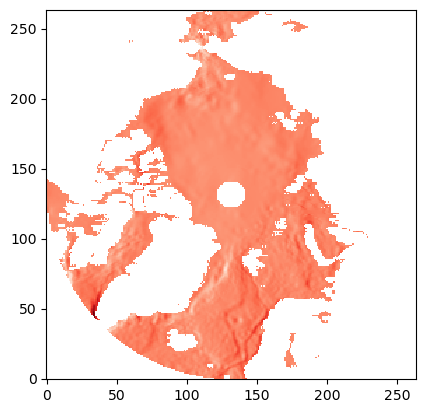

In [31]:
fig, ax = plt.subplots()
cm = ax.pcolormesh(ds_surface_velocities.x, ds_surface_velocities.y, ds_surface_velocities.vs, cmap="Reds")
ax.set_aspect("equal")

In [32]:
ub = ds_surface_velocities.us - ds_thermalwind.ut
ub.name = "ub"

vb = ds_surface_velocities.vs - ds_thermalwind.vt
vb.name = "vb"

ds_bottom_velocities = xr.merge([ub, vb])
ds_bottom_velocities

<xarray.Dataset> Size: 2MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    ub       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    vb       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan

In [33]:
ds_velocities = xr.merge([ds_mdt.mdt, ds_surface_velocities, ds_thermalwind, ds_bottom_velocities])
ds_velocities

<xarray.Dataset> Size: 4MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    mdt      (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    us       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    vs       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    ut       (y, x) float64 558kB ...
    vt       (y, x) float64 558kB ...
    ub       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    vb       (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    long_name:      Mean dynamic topography
    standard_name:  mean_dynamic_topography
    grid_mapping:   crs
    units:          m
    limitations:    No data in the Mediterranean and Black Seas

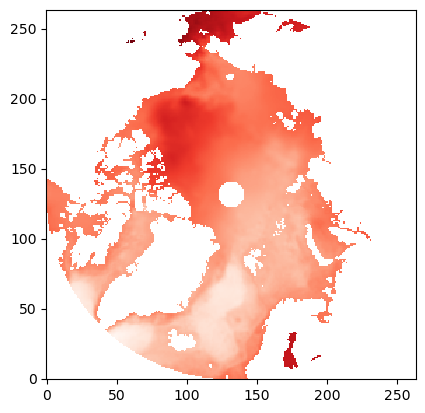

In [34]:
fig, ax = plt.subplots()
cm = ax.pcolormesh(ds_velocities.x, ds_velocities.y, ds_velocities.mdt, cmap="Reds")
ax.set_aspect("equal")

In [35]:
ds_velocities.to_netcdf(datadir + f"velocities_{mdt}_{hydrography}_ease.nc")